# US Health Insurance Dataset

## Installing the neccessary packages

In [10]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install tqdm
!pip install -U scikit-learn

## Imports

In [11]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from tqdm import tqdm_notebook
from tqdm.notebook import tnrange
import itertools

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import warnings


warnings.filterwarnings("ignore")

### Loading the Dataset

In [12]:
url = 'https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv'
data = pd.read_csv(url)

data.head()

# We can see that this dataset has 7 columns, in which it has 3 nominal categorical data and the rest are numbers.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Shape of the Data

In [13]:
data.shape

# We can see the shape of the dataset, i.e. 1338 rows and 7 columns

(1338, 7)

### Features present in the Dataset

In [14]:
data.columns

# Here, in this dataset, "Charges" is the target variable.

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Checking for NULL values

In [15]:
data.isnull().sum()

# Here, we can see that the dataset has "no" NULL values.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Information regarding the Dataset

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Descriptive statistics of the Data

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Data Types of the Data

In [18]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [19]:
for i in ['sex','smoker', 'region']:
    print(f"{data[i].value_counts()}\n\n")

male      676
female    662
Name: sex, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64




In [20]:
data_1 = data.copy()

## EDA

In [21]:
numerical = ['age', 'bmi', 'children', 'charges']
categorical = ['sex', 'smoker', 'region']

### Age

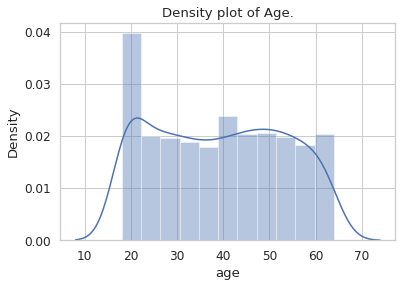

In [22]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})
sns.distplot(data['age']).set(title="Density plot of Age.")
plt.show()

#### **Inference**

* The data is slightly skewed
* The figure has 2 peaks

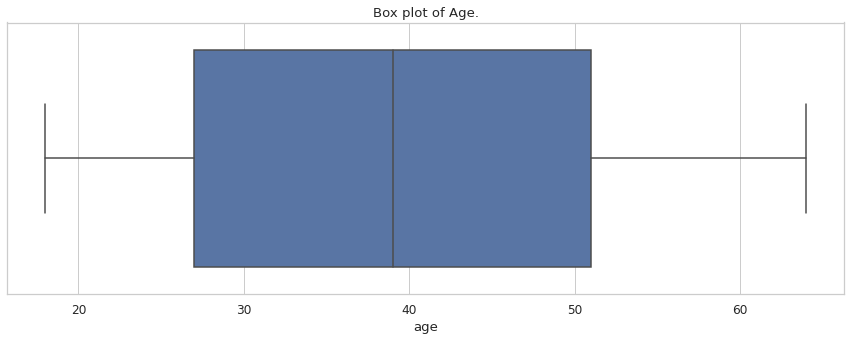

In [23]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})
sns.boxplot(data.age).set(title="Box plot of Age.")
plt.show()

#### **Inference**

* There are no outliers in this data

### BMI

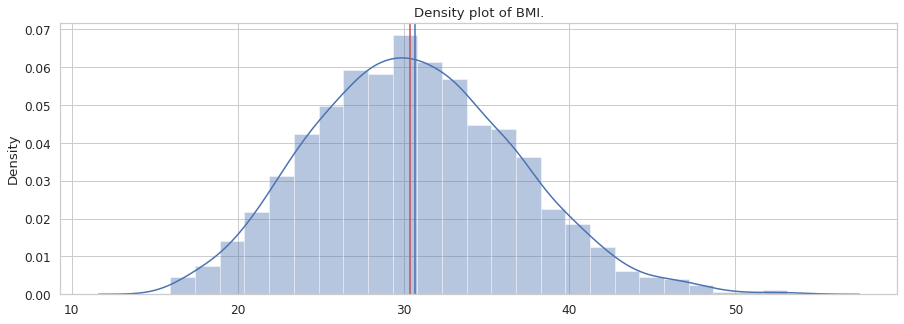

In [24]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})
sns.distplot(x = data.bmi).set(title="Density plot of BMI.")
plt.axvline(data.bmi.mean(),color='b')
plt.axvline(data.bmi.median(),color='r')
plt.show()

#### **Inference**

* This is normally distributed

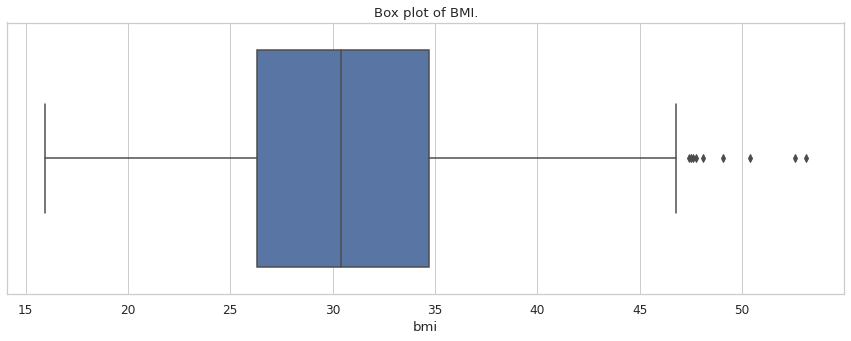

In [25]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})
sns.boxplot(x = data.bmi).set(title="Box plot of BMI.")
plt.show()

##### **Inference**:
*    BMI contains outliers on the higher range.  
*    Its density plot will be skewed on the right.

### Number of Children

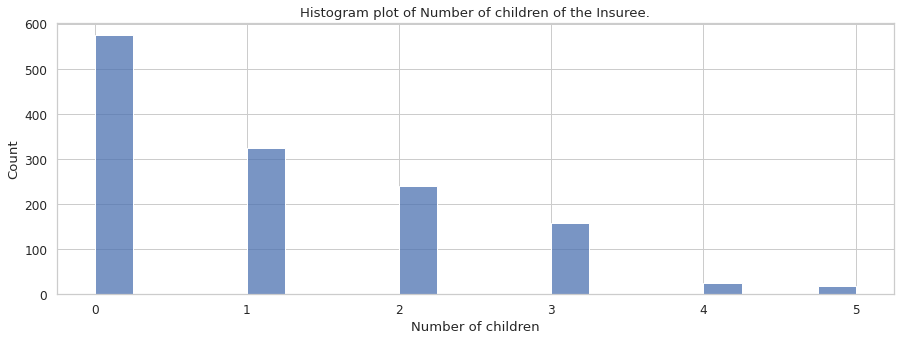

In [26]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})
sns.histplot(data['children'], bins=20).set(xlabel='Number of children', title="Histogram plot of Number of children of the Insuree.")
plt.show()

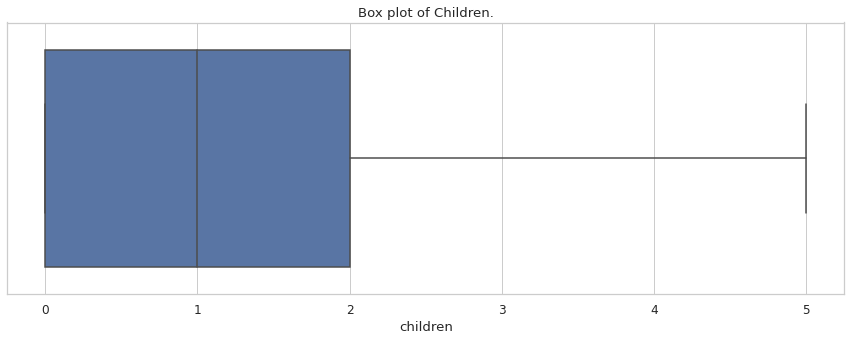

In [27]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})
sns.boxplot(data.children).set(title="Box plot of Children.")
plt.show()

#### **Inference**

* We can see most of the people have no children

### Charges

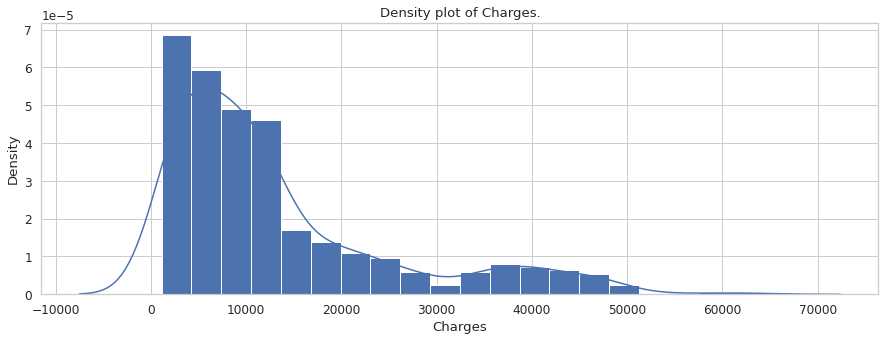

In [28]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [15, 5]})
sns.distplot(
    data['charges'], kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Charges', title="Density plot of Charges.")
plt.show()

#### **Inference**

* This plot is heavily skewed to the left

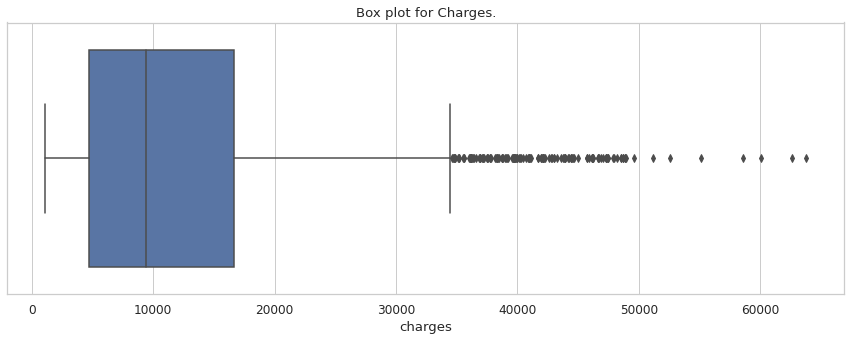

In [29]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})
sns.boxplot(data.charges).set(title="Box plot for Charges.")
plt.show()

#### **Inference**

* Charges contains outliers

### Gender

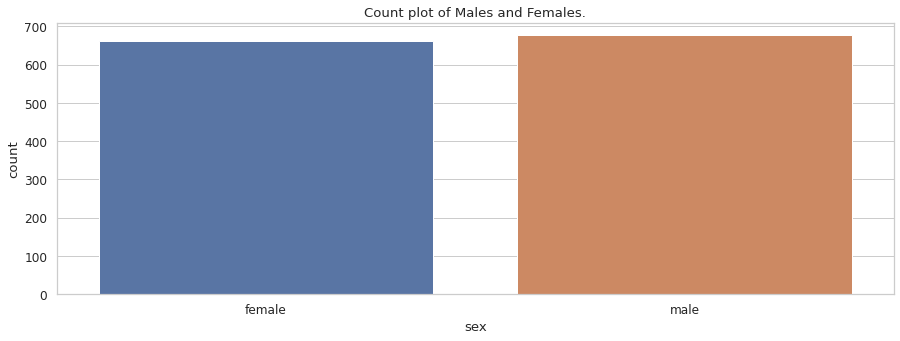

In [30]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})
sns.countplot(data['sex']).set(title="Count plot of Males and Females.")
plt.show()

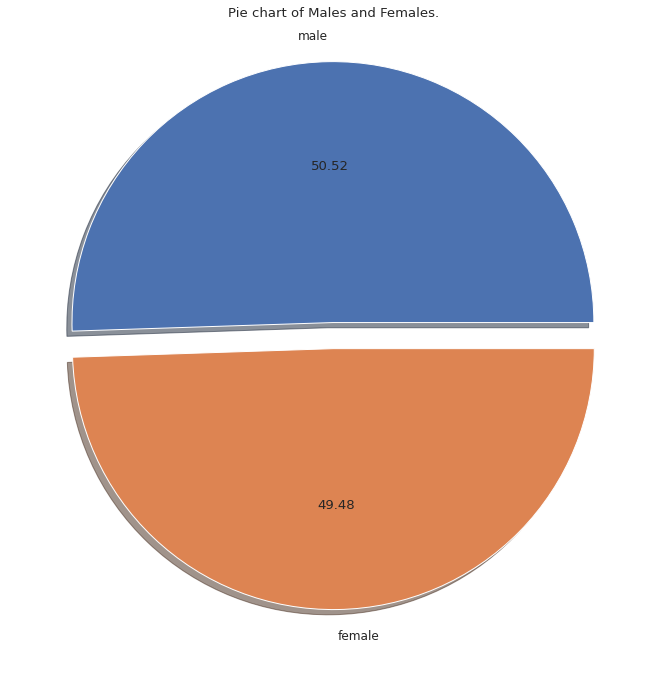

In [31]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [12, 12]})
plt.pie(data['sex'].value_counts().tolist(), labels = ['male', 'female'], explode= [0.1,0], autopct= '%.2f', shadow= True)
plt.title("Pie chart of Males and Females.")
plt.show()

#### **Inference**

* The dataset is almost evenly distributed

### Smokers

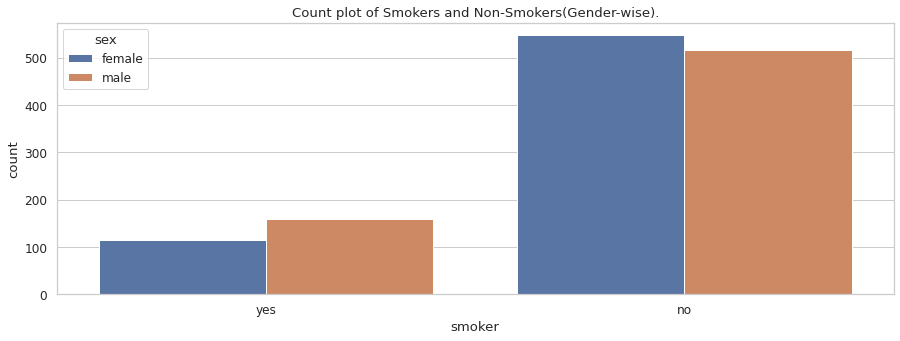

In [32]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})
sns.countplot(data['smoker'], hue = data.sex).set(title="Count plot of Smokers and Non-Smokers(Gender-wise).")
plt.show()

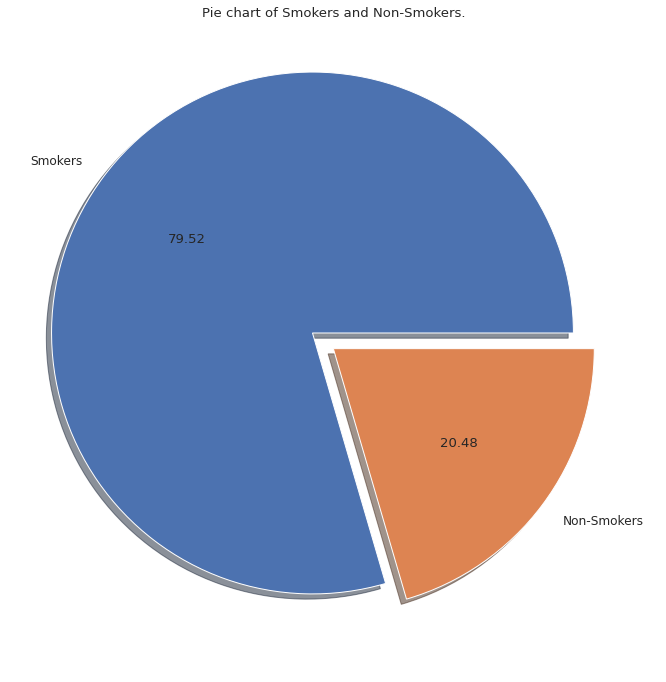

In [33]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [12, 12]})
plt.pie(data['smoker'].value_counts().tolist(), labels = ['Smokers', 'Non-Smokers'], explode= [0.1,0], autopct= '%.2f', shadow= True)
plt.title("Pie chart of Smokers and Non-Smokers.")
plt.show()

In [34]:
data.groupby('smoker')['charges'].max()

smoker
no     36910.60803
yes    63770.42801
Name: charges, dtype: float64

#### **Inference**

* Charges is high for people who smoke
* The dataset contains more number of Non Smokers

### Regions

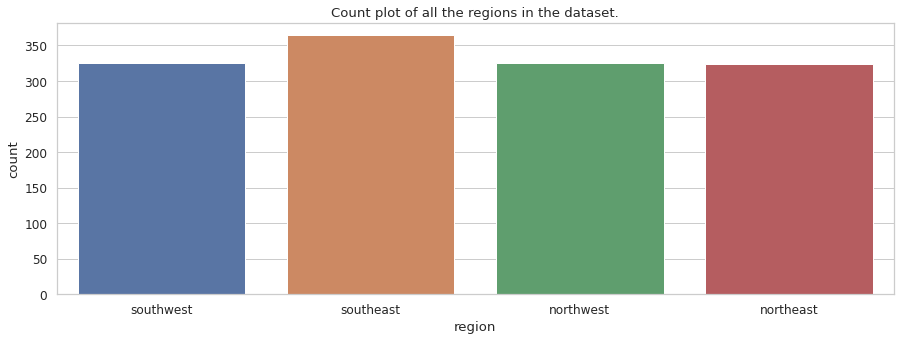

In [35]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})
sns.countplot(data['region']).set(title="Count plot of all the regions in the dataset.")
plt.show()

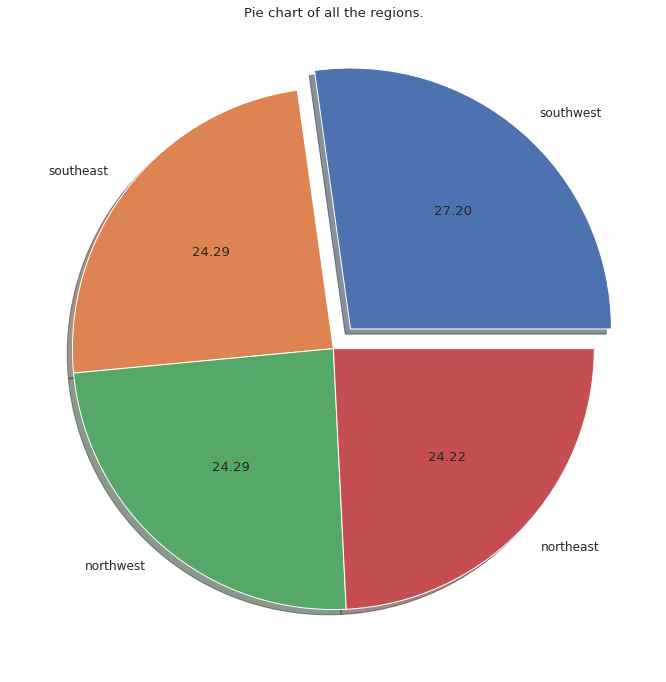

In [36]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [12, 12]})
plt.pie(data['region'].value_counts().tolist(), labels = ['southwest','southeast','northwest','northeast'], explode= [0.1,0,0,0], autopct= '%.2f', shadow= True)
plt.title("Pie chart of all the regions.")
plt.show()

#### **Inference**

* All the regions are replresented evenly

### Scatter Plots

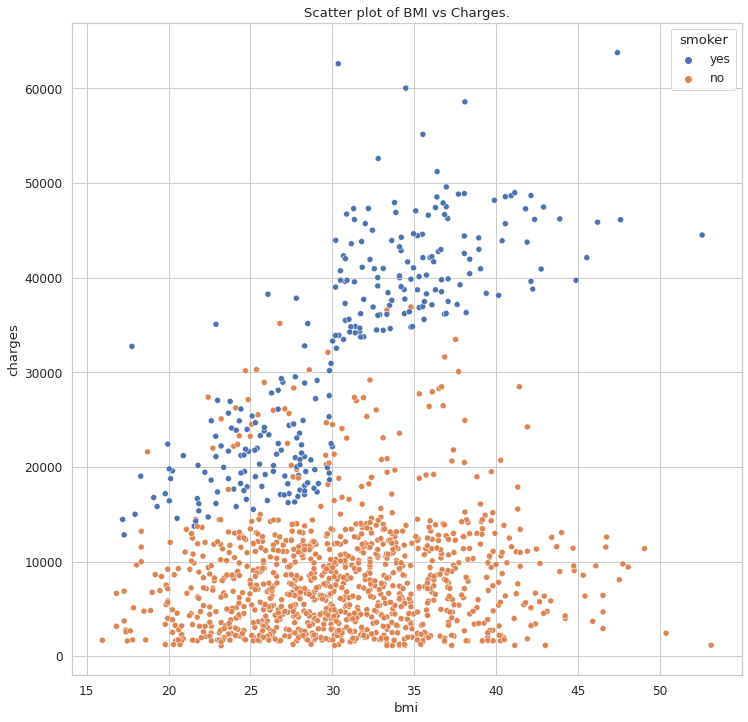

In [37]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [12, 12]})
sns.scatterplot(x = data.bmi,y = data.charges, hue = data.smoker).set(title="Scatter plot of BMI vs Charges.")
plt.show()

# Scatter plot of BMI vs Charges

#### **Inference**

* We can see that Smokers have high BMI and have high charges and Non-Smokers have less BMI and have less charges.

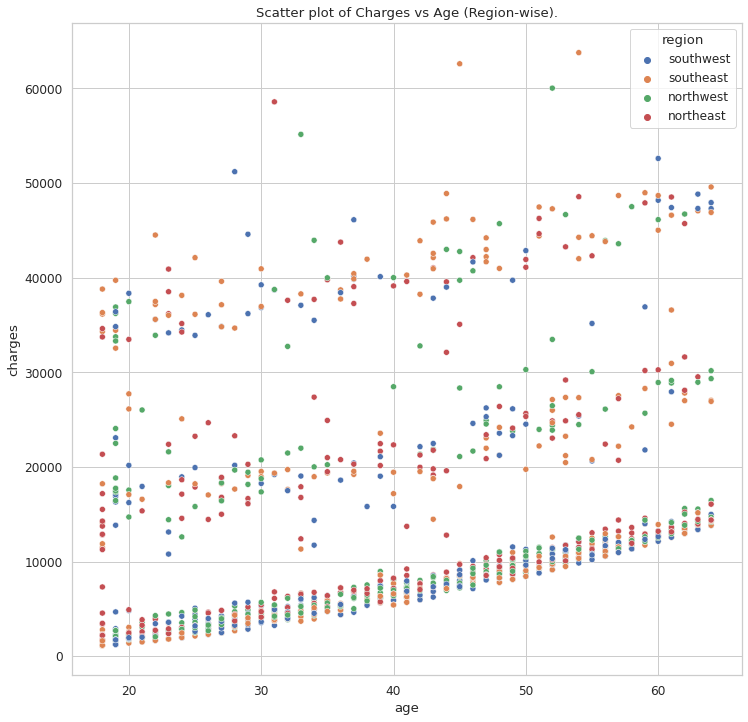

In [38]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [12, 12]})
sns.scatterplot(x = data.age,y = data.charges,hue=data.region).set(title="Scatter plot of Charges vs Age (Region-wise).")
plt.show()

# Here we can see the scatter plot of Charges vs Age, region wise. 

#### **Inference**

* We can't see anything strange.

### Pair plot

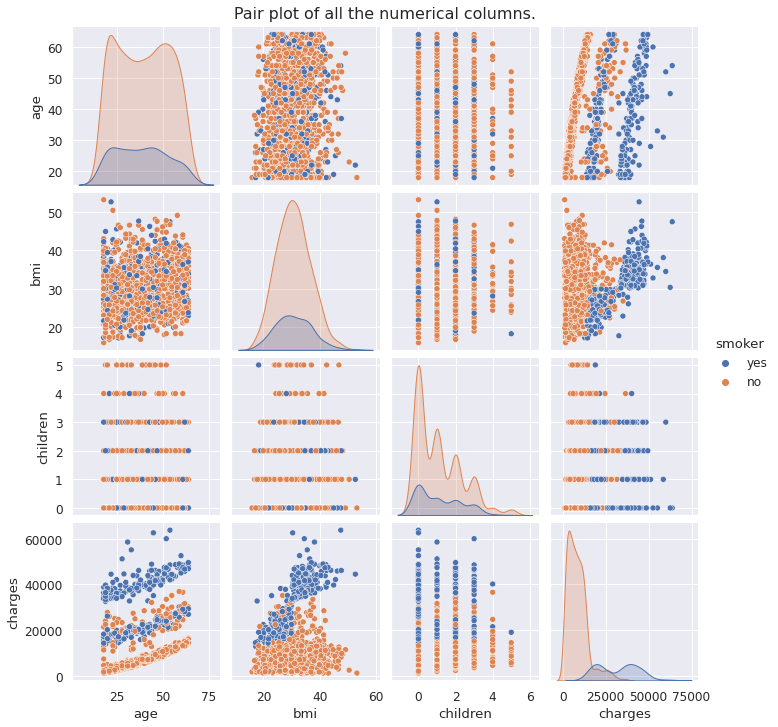

In [39]:
sns.set(palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 15]})
t = sns.pairplot(data, hue = 'smoker')
t.fig.suptitle("Pair plot of all the numerical columns.", y = 1.01)
plt.show()

# This is the pair plot of all the numerical columns in our dataset

#### **Inference**

* Charges and Age are positively correlated.
* 

### Correlation plot

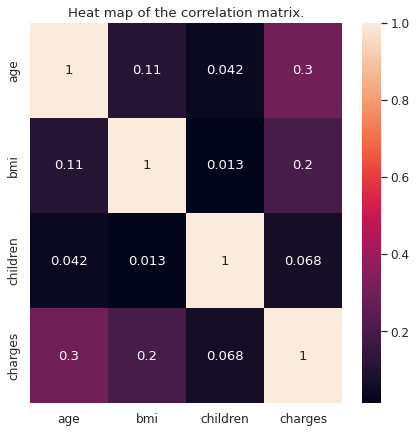

In [40]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [7, 7]})
sns.heatmap(data.corr(), annot= True).set(title="Heat map of the correlation matrix.")
plt.show()

#### **Inference**

* Age and Charges are comparitively weakly correlated to each other
* After Age, BMI is correlated to Charges

## Data wrangling

In [48]:
# As we saw earlier in the dataset, it had three nominal data, we will use one hot encoding to convert the string data to numbers.

data_1 = pd.get_dummies(data_1)

In [42]:
data_1

# Now we have got all the columns as quantitative data.

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [43]:
(data_1.columns )

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

## Feature Selection

In [44]:
# Using Best-Subset Selection

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def fit_linear_reg(X,y):
    # fit linear regression model and return RSS and r squared
    model_k = LinearRegression()
    model_k.fit(X,y)
    RSS = mean_squared_error(y,model_k.predict(X))*len(y) 
    R_squared = model_k.score(X,y) 
    adj_R_squared = 1 - (1-R_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return RSS, R_squared, adj_R_squared 



In [49]:
# tqdm for progress bar 
from tqdm import tqdm_notebook
from tqdm.notebook import tnrange
import itertools

#Initialize variables 
y = data_1.charges
X = data_1.drop(columns='charges',axis=1) 

m = 11

RSS_list, R_squared_list, feature_list = [], [], []
adj_R_squared_list = []
numb_features = []

#looping over m=1 to m=11 features in X
#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        adj_R_squared_list.append(tmp_result[2])
        feature_list.append(combo)
        numb_features.append(len(combo))   

# Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'Adj_R_squared': adj_R_squared_list, 'features':feature_list})

Loop...:   0%|          | 0/11 [00:00<?, ?it/s]

In [50]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
df_max_adj = df[df.groupby('numb_features')['Adj_R_squared'].transform(max) == df['Adj_R_squared']]
display(df_min.head())
display(df_max_adj.head())

,numb_features,RSS,R_squared,Adj_R_squared,features
5,1,7.455432e+10,0.619765,0.619480,"(smoker_no,)"
6,1,7.455432e+10,0.619765,0.619480,"(smoker_yes,)"
16,2,5.462612e+10,0.721401,0.720983,"(age, smoker_yes)"
69,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker_no)"
70,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker_yes)"


,numb_features,RSS,R_squared,Adj_R_squared,features
5,1,7.455432e+10,0.619765,0.619480,"(smoker_no,)"
6,1,7.455432e+10,0.619765,0.619480,"(smoker_yes,)"
16,2,5.462612e+10,0.721401,0.720983,"(age, smoker_yes)"
69,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker_no)"
70,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker_yes)"


In [51]:
df = df.sort_values(by=['Adj_R_squared'], ascending= False)
display(df)

,numb_features,RSS,R_squared,Adj_R_squared,features
1063,6,4.884618e+10,0.750879,0.749756,"(age, bmi, children, smoker_no, region_northea..."
1069,6,4.884618e+10,0.750879,0.749756,"(age, bmi, children, smoker_yes, region_northe..."
1068,6,4.886534e+10,0.750781,0.749658,"(age, bmi, children, smoker_no, region_southea..."
1074,6,4.886534e+10,0.750781,0.749658,"(age, bmi, children, smoker_yes, region_southe..."
1510,7,4.884047e+10,0.750908,0.749597,"(age, bmi, children, sex_female, smoker_yes, r..."
...,...,...,...,...,...
8,1,1.957620e+11,0.001592,0.000845,"(region_northwest,)"
62,2,1.956959e+11,0.001930,0.000434,"(region_northeast, region_southwest)"
60,2,1.957530e+11,0.001638,0.000143,"(region_northeast, region_northwest)"
7,1,1.960663e+11,0.000040,-0.000708,"(region_northeast,)"


In [52]:
selected_features = list(df.iloc[0][4])

print(selected_features)

['age', 'bmi', 'children', 'smoker_no', 'region_northeast', 'region_northwest']


## Modelling

In [53]:
from sklearn.model_selection import train_test_split

y = data_1['charges']
X = data_1[selected_features]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Training dataset R2 score:\t{round(model.score(X_train, y_train)*100, 3)}%")
print(f"Test dataset R2 score:\t\t{round(model.score(X_test, y_test)*100, 3)}%")



Training dataset R2 score:	75.526%
Test dataset R2 score:		73.156%


##### We can see that
* *R^2* value of the *Training data* is **75.526%** 
* *R^2* value of the *Test data* is **73.156%**